# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №1: визуализация, k-NN регрессия, кросс-валидация.

<hr\>
**Общая информация**

**Срок сдачи:** 15 марта 2017, 23:59 <br\>

При отправлении ДЗ на почту `hse.minor.dm+2@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-2] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

В этом задании мы рассмотрим задачу прогнозирования количества взятых в аренду велосипедов.

Файл [bike_sharing.csv](https://yadi.sk/d/n8iy_trO3EsUBa) содержит данные о 731 дне работы сервиса по аренде велосипедов. Про каждый день известны:

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius from 0 to 100.
- atemp: Normalized feeling temperature in Celsius from 0 to 100.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**1. (0.25 балла)** Откройте файл bike_sharing.csv, запишите в датафрейм df и выведите первые пять строк датафрейма.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [2]:
df = pd.read_csv('bike_sharing.csv', index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34.4167,36.3625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36.3478,35.3739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,19.6364,18.9405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20.0000,21.2122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,22.6957,22.9270,0.436957,0.186900,82,1518,1600


**2. (1 балл)** Постройте график среднего числа арендованных байков (cnt) по каждому месяцу. Не забудьте подписать оси координат. Убедитесь, что в летние месяцы велосипеды в прокат берут чаще.

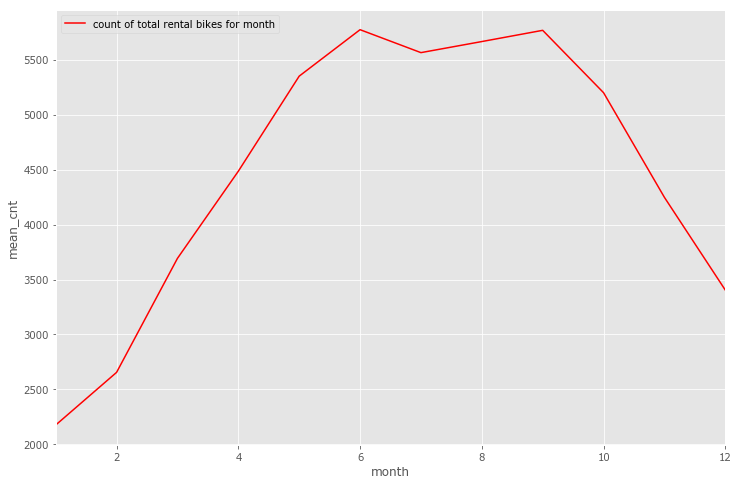

In [3]:
s = []
for i in range(1,13):
    idx = df.mnth == i
    mean_month = df.loc[idx,'cnt'].mean()
    s.append(mean_month)
ser_mean_month = pd.Series(s, index=range(1,13))
ser_mean_month.T.plot(label='count of total rental bikes for month', c='red')
plt.xlabel('month')
plt.ylabel('mean_cnt')
plt.legend(loc=2)

** 3. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot) с осями cnt и atemp, где точки — это объекты. Какой логичный вывод можно сделать по этому графику?

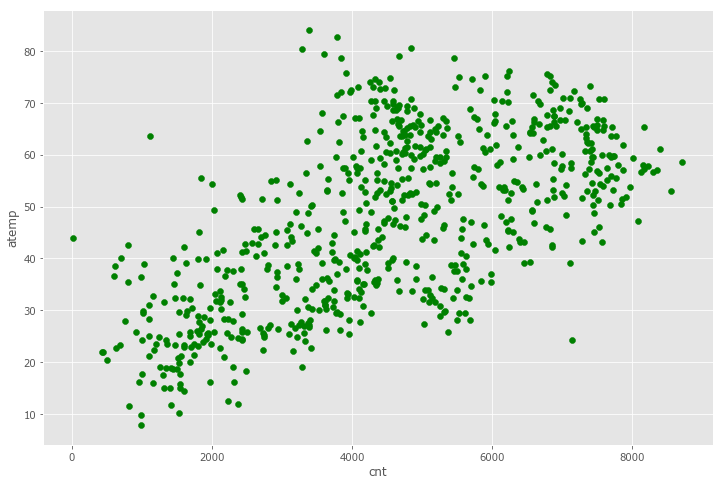

In [4]:
plt.scatter(df.cnt, df.atemp, c='green')
plt.xlabel('cnt')
plt.ylabel('atemp') #люди чаще берут в аренду велосипеды, когда температура не низкая и не высокая.

**4. (0.5 балла)** Преобразуйте небинарные категориальные признаки с помощью one-hot кодирования. Сделать это можно с помощью функции pd.get_dummies, указав нужные столбцы в параметре columns. Сколько признаков получилось после кодирования? И какой категориальный признак породил больше всего бинарных?

In [5]:
df.shape

(731, 16)

In [6]:
df = pd.get_dummies(df, columns=['season','mnth','weekday', 'weathersit'])
df.shape #число признаков увеличилось на 22

(731, 38)

In [7]:
df.iloc[0, :] #признак month породил больше всего бинарных

instant                  1
dteday          2011-01-01
yr                       0
holiday                  0
workingday               0
temp               34.4167
atemp              36.3625
hum               0.805833
windspeed         0.160446
casual                 331
registered             654
cnt                    985
season_1                 1
season_2                 0
season_3                 0
season_4                 0
mnth_1                   1
mnth_2                   0
mnth_3                   0
mnth_4                   0
mnth_5                   0
mnth_6                   0
mnth_7                   0
mnth_8                   0
mnth_9                   0
mnth_10                  0
mnth_11                  0
mnth_12                  0
weekday_0                0
weekday_1                0
weekday_2                0
weekday_3                0
weekday_4                0
weekday_5                0
weekday_6                1
weathersit_1             0
weathersit_2             1
w

**5. (0.25 балла)** Удалите столбцы instant, dteday, casual и registered. Предположите, почему мы удаляем эти признаки.

In [8]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df.head()
# признак instant может быть удален в виду своей ненадобности, он по сути играет роль колонки индекса;
# так как у нас есть признаки mnth, year и weekday, признак с точными датами нам не так нужен,
# к тому же он сложен в преобразовании, например при приведении к бинарному виду;
# casual и registered в сумме дают сnt, по сути они лишние, ведь наша цель - прогнозирование числа всех арендованных байков 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,34.4167,36.3625,0.805833,0.160446,985,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,36.3478,35.3739,0.696087,0.248539,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,19.6364,18.9405,0.437273,0.248309,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,20.0000,21.2122,0.590435,0.160296,1562,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,22.6957,22.9270,0.436957,0.186900,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


**6. (0.5 балла)** Далее нашей целевой переменной будет количество арендованных велосипедов (cnt). Поэтому запишите cnt в переменную df_ans и удалите из df. Затем в помощью функции train_test_split из sklearn.model_selection разделите выборку на обучающую и контрольную в отношении 7 к 3, создав переменные X_train, X_test, y_train, y_test.

Замечание 1: установите random_seed, чтобы генератор псевдослучайных чисел работал всегда одинаково.

Замечание 2: если в sklearn.model_selection нет функции train_test_split, обновите scikit-learn.

In [9]:
df_ans = df.cnt
df_new = df.drop(['cnt'], axis=1)
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,34.4167,36.3625,0.805833,0.160446,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,36.3478,35.3739,0.696087,0.248539,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,19.6364,18.9405,0.437273,0.248309,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,20.0000,21.2122,0.590435,0.160296,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,22.6957,22.9270,0.436957,0.186900,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new, df_ans, test_size=0.3, random_state = 123)


**7. (1 балл)** Обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

mean_absolute_error(y_hat, y_test)

1034.2063636363637

**8. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot), по одной оси отметив настоящее число аренд велосипедов, а по другой — предсказанное алгоритмом. Дополнительно на этом графике постройте прямую $y = x$. Чему соотстветствует отклонение от этой прямой?

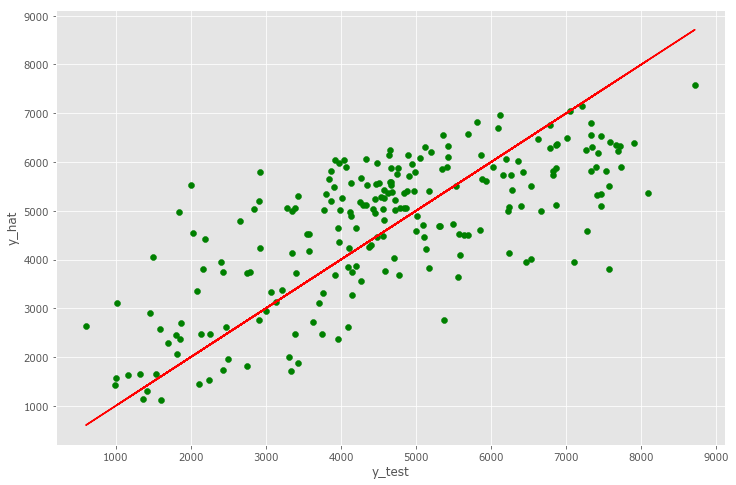

In [12]:
plt.scatter(y_test, y_hat, c='green')
plt.xlabel('y_test')
plt.ylabel('y_hat')
plt.plot(y_test, y_test, c='r') 
#при одинаковом y_test отклонение от этой прямой есть abs(y.hat-y.test) - абсолютная ошибка для соответствующего значения y_test

In [13]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,34.4167,36.3625,0.805833,0.160446,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,36.3478,35.3739,0.696087,0.248539,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,19.6364,18.9405,0.437273,0.248309,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,20.0000,21.2122,0.590435,0.160296,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,22.6957,22.9270,0.436957,0.186900,1,0,0,...,0,0,0,1,0,0,0,1,0,0


**9. (1 балл)** Отмасштабируйте признаки, чтобы они принимали значения на $[0, 1]$.

Это можно сделать собственноручно с помощью операций pandas.

Иначе — можно использовать MinMaxScaler из sklearn.preprocessing — класс с методами fit и transform. 
Для этого:

* либо соедините X_train и X_test обратно в единый датафрейм, отмасштабируйте и разъедините обратно,
* либо отмасштабируйте df (без ответов) и разделите на обучающую и контрольную выборку, используя тот же random_seed.

На выходе метода transform получится numpy-массив, который нужно будет превратить обратно в датафрейм.

In [14]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
new_col = min_max_scaler.fit_transform(df_new.loc[:,:])#удобнее сразу использовать fit_transform
df_new.loc[:,:] = new_col
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0.0,0.0,0.0,0.355170,0.373517,0.828620,0.284606,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.379232,0.360541,0.715771,0.466215,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.171000,0.144830,0.449638,0.465740,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.175530,0.174649,0.607131,0.284297,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.209120,0.197158,0.449313,0.339143,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df_ans, test_size=0.3, random_state = 123) #опять делим выборку


**10. (0.5 балла)** Вновь обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке. Почему качество поменялось?

In [16]:
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

mean_absolute_error(y_hat, y_test)  #потому что теперь все признаки находятся в одном и том же отрезке, теперь алгоритм 
#находит более четкую зависимость, так как ранее были признаки, которые сильно отличались по масштабу от остальных

865.90090909090918

**11. (1.25 балла)** Используя класс KFold из sklearn.model_selection установите с помощью кросс-валидации на пяти фолдах, какой параметр weights лучше с точки зрения mean absolute error. 

In [17]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=123)
w = ['uniform', 'distance']
uni_mistake = []
dis_mistake = []
for i in w:
    for idx_train, idx_test in kf.split(X_train): #индексы для разделения на тестовую и обучающую выборку
        knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean', weights=i)
        knn.fit(X_train.iloc[idx_train,:], y_train.iloc[idx_train]) #обучение соответствующих разделенных частей X_train
        y_hat = knn.predict(X_train.iloc[idx_test,:]) #предсказываем на той части X_train, которую мы взяли за тестовую
        if i == 'uniform':
            uni_mistake.append(mean_absolute_error(y_hat, y_train.iloc[idx_test])) #создание списка из ошибок для каждого i 
        else:
            dis_mistake.append(mean_absolute_error(y_hat, y_train.iloc[idx_test]))
print(sum(uni_mistake)/5)
print(sum(dis_mistake)/5)
#лучше всего подходит distance, ошибка меньше


837.159737293
802.540916216


**12. (2.5 балла)** С помощью GridSearchCV из sklearn.model_selection на пяти фолдах выберите лучшее значение $k$ от 1 до 50. Постройте график MAE на кросс-валидации в зависимости от $k$. 

Замечание: Передать нужную метрику качества для GridSearchCV можно через параметр scoring, но не всё так просто. Из метрики качества нужно сделать «scorer» c помощью функции sklearn.metrics.make_scorer, не забыв указать нужное значение greater_is_better.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

mae = make_scorer(mean_absolute_error, greater_is_better = False)
knn = KNeighborsRegressor(n_neighbors=range(1,51), metric='euclidean', weights='distance') #теперь знаем, что c distance лучше
param_dict = {'n_neighbors':range(1,51)} #делаю словарь для изменения параметра числа ближайших соседей
grid = GridSearchCV(estimator= knn, cv=5, param_grid = param_dict, scoring = mae)
grid.fit(X_train, y_train)
grid.best_params_ #нашли лучшее значение k

{'n_neighbors': 7}

In [19]:
mean_mistake = grid.cv_results_.get('mean_test_score') #cv_results_ возвращает словарь, в котором уже есть
#массив из всех средних арифм. по MAE ошибкам для каждого k, находим его по ключу 'mean_test_score'
mean_mistake = np.negative(mean_mistake)
mean_mistake

array([ 1123.37377691,   987.82321286,   889.38577506,   845.64646705,
         802.60369529,   794.33530466,   781.59330357,   782.7886785 ,
         786.07289971,   796.85592653,   808.98848495,   814.14856811,
         823.34013905,   836.27085525,   847.49227363,   857.65400891,
         866.78286088,   872.87776583,   881.71421141,   890.86473914,
         895.2073389 ,   897.85497811,   895.22241234,   896.32507489,
         899.47856319,   902.3576026 ,   899.24787835,   898.82839635,
         898.31920058,   897.24310793,   893.93992243,   893.73598436,
         893.37474529,   891.53330242,   889.87578412,   886.55547048,
         883.41482815,   881.50757277,   882.21407114,   882.44046168,
         881.18612995,   880.71502989,   877.3471415 ,   877.58341218,
         876.56007059,   878.15831636,   880.14097822,   882.08116674,
         884.09454965,   886.60837182])

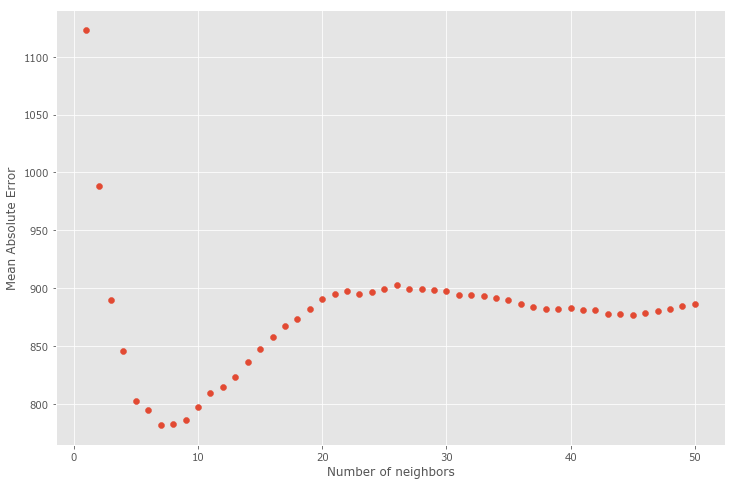

In [20]:
num = [x for x in range(1,51)]
plt.scatter(num, mean_mistake)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Absolute Error')

**13. (0.25 балла)** Посчитайте качество итоговой модели на контрольной выборке. 

In [21]:
y_hat2 = grid.predict(X_test)
mean_absolute_error(y_hat2, y_test)

776.18050943690764